In [4]:
import pandas as pd
import seaborn as sns

              answer   in_text  in_image  in_speaker     other
answer      1.000000 -0.060838 -0.067361    0.066767  0.001280
in_text    -0.060838  1.000000  0.150832   -0.220482 -0.478034
in_image   -0.067361  0.150832  1.000000   -0.090738 -0.328326
in_speaker  0.066767 -0.220482 -0.090738    1.000000 -0.696646
other       0.001280 -0.478034 -0.328326   -0.696646  1.000000


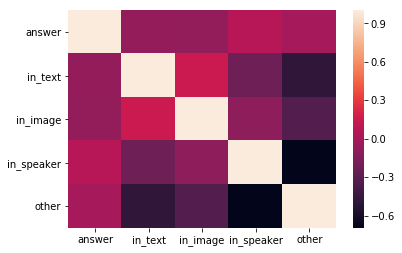

In [5]:
complete_df = pd.read_csv('data/complete_data.csv')
corr = complete_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

              answer   in_text  in_image  in_speaker     other
answer      1.000000 -0.113353 -0.046628    0.036157  0.065635
in_text    -0.113353  1.000000  0.179433   -0.365072 -0.493832
in_image   -0.046628  0.179433  1.000000    0.102998 -0.419207
in_speaker  0.036157 -0.365072  0.102998    1.000000 -0.611166
other       0.065635 -0.493832 -0.419207   -0.611166  1.000000


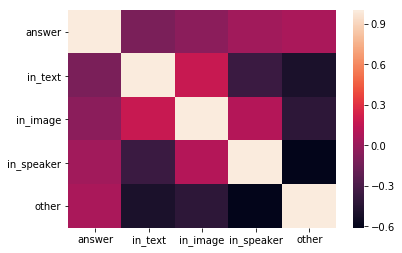

In [6]:
infer_df = pd.read_csv('data/infer.csv')
corr = infer_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

              answer   in_text  in_image  in_speaker     other
answer      1.000000 -0.017466 -0.078860    0.089676 -0.043123
in_text    -0.017466  1.000000  0.207983   -0.288923 -0.362786
in_image   -0.078860  0.207983  1.000000   -0.118246 -0.382408
in_speaker  0.089676 -0.288923 -0.118246    1.000000 -0.714918
other      -0.043123 -0.362786 -0.382408   -0.714918  1.000000


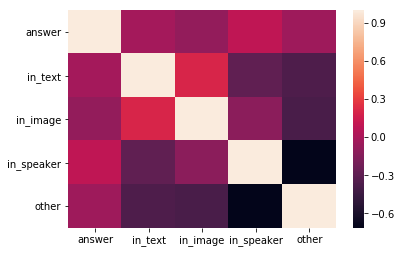

In [7]:
recall_df = pd.read_csv('data/recall.csv')
corr = recall_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

In [8]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [9]:
calculate_pvalues(complete_df)

,answer,in_text,in_image,in_speaker,other
answer,0,0.3736,0.3244,0.3287,0.9851
in_text,0.3736,0,0.0267,0.0011,0
in_image,0.3244,0.0267,0,0.184,0
in_speaker,0.3287,0.0011,0.184,0,0
other,0.9851,0,0,0,0


In [10]:
calculate_pvalues(infer_df)

,answer,in_text,in_image,in_speaker,other
answer,0,0.3431,0.6973,0.763,0.5838
in_text,0.3431,0,0.1315,0.0016,0
in_image,0.6973,0.1315,0,0.3893,0.0002
in_speaker,0.763,0.0016,0.3893,0,0
other,0.5838,0,0.0002,0,0


In [11]:
calculate_pvalues(recall_df)

,answer,in_text,in_image,in_speaker,other
answer,0,0.8354,0.3475,0.2851,0.6078
in_text,0.8354,0,0.0124,0.0004,0
in_image,0.3475,0.0124,0,0.1581,0
in_speaker,0.2851,0.0004,0.1581,0,0
other,0.6078,0,0,0,0
